#### Task 1: Image Binarization using a predefined global threshold

In [27]:
import cv2
from matplotlib import pyplot as plt

def convert2binary(image):
    
    #open image and convert to grayscale
    img = cv2.imread(image, 0)
    
    plt.subplot(121)
    plt.imshow(img, cmap="gray")
    
    #get dimensions of the image
    row = img.shape[0]
    column = img.shape[1]

    #converts to binary
    for i in range(0, row):
        for j in range (0, column):
            if img[i,j] > 127:
                img[i,j] = 0
            else:
                img[i,j] = 1

    #show binary image
    plt.subplot(122)
    plt.imshow(img, cmap="binary")
    plt.show()

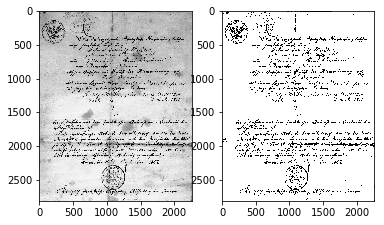

In [52]:
convert2binary("B2.jpg")

#### Task 2: Create Intensity Histogram from a Greyscale image

In [31]:
import cv2 
from matplotlib import pyplot as plt 
import numpy as np
  
def myHistogram(image):
    
    # reads an input image and converts to grayscale
    img = cv2.imread(image ,0) 
    
    #display using library histogram function
    plt.hist(img.ravel(),256,[0,256])
    plt.title("Histogram using library function")
    plt.show()

    #find the dimensions of the image
    row = img.shape[0]
    column = img.shape[1]

    frequency = [0] * 256

    #count the occurance of each rgb value
    for i in range(0, row):
        for j in range (0, column):
            frequency[img[i, j]] += 1

    plt.bar(range(256),frequency)
    plt.title("Histogram using myHistogram function")
    plt.show()  

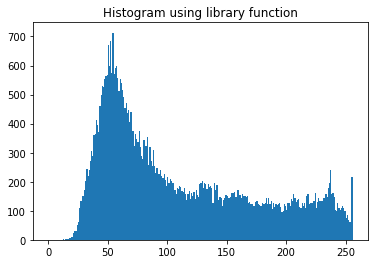

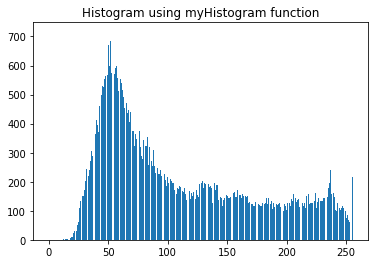

In [50]:
myHistogram('B3.jpg')

#### Task 3: Recursive XY-cut algorithm 

In [47]:
import cv2
from matplotlib import pyplot as plt 
import numpy as np

def XYcut(image, start):
    
    #read grayscale image and convert to binary 
    img = cv2.imread(image, 0)
    ret,img = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)

    #get dimensions of image
    row = img.shape[0]
    column = img.shape[1]
    
    #boolean to ensure that slicing only happens after a line
    enabled = False
    
    for i in range(start, row):
        
        white_count = 0
        black_count = 0
        
        for j in range (0, column):
            if img[i,j] == 0 :
                white_count += 1
            else:
                black_count += 1
        
        #if number of black pixels is greater than atleast half of white,
        #start looking for place to slice
        if black_count > white_count/2:
            enabled = True
            
        if enabled:
            if black_count < white_count*.05 :
                slice = img[start:i, 0:j]
                plt.imshow(slice, cmap="binary")
                plt.show()
                start = i
                break
    
    #if end of image is not occured, recurively call the function
    if i != row-1:
        XYcut(image, start)

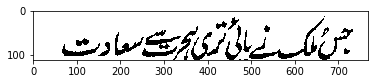

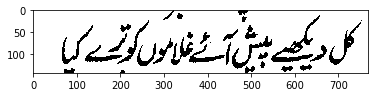

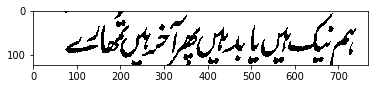

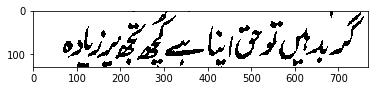

In [49]:
XYcut("XY-cutss.png", 0)